In [1]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model, model_from_json
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

Using plaidml.keras.backend backend.


In [2]:
batch_size = 32
DS_DIR = os.path.join(os.getcwd(), 'datasets')
TRAINING_DIR = os.path.join(DS_DIR, 'training_set')
VALID_DIR = os.path.join(DS_DIR, 'valid_set')
AUG_DIR = os.path.join(os.getcwd(), 'augmented_datasets')
MODEL_PATH = os.path.join(os.getcwd(), 'model')
# path to model weights and architechture file
MODEL_FILE = os.path.join(MODEL_PATH, 'weights.hdf5')
print('Dataset Directiry:', DS_DIR)
print('Training Set Directiry:', TRAINING_DIR)
print('Validation Set Directiry:', VALID_DIR)
print('Augmented Set Directiry:', AUG_DIR)
print('Trained Model Saved to:', MODEL_FILE)

Dataset Directiry: /home/wei/git/itir_cv/datasets
Training Set Directiry: /home/wei/git/itir_cv/datasets/training_set
Validation Set Directiry: /home/wei/git/itir_cv/datasets/valid_set
Augmented Set Directiry: /home/wei/git/itir_cv/augmented_datasets
Trained Model Saved to: /home/wei/git/itir_cv/model/weights.hdf5


In [3]:
training_datagen = ImageDataGenerator(rotation_range=45,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=False,
                                      fill_mode='nearest')

training_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(54, 54),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
)

validation_datagen = ImageDataGenerator(rotation_range=10,
                                        zoom_range=0.1,
                                        fill_mode='nearest')

validation_generator = validation_datagen.flow_from_directory(
    VALID_DIR,
    target_size=(54, 54),
    batch_size=batch_size,
    color_mode='grayscale')

img = load_img(TRAINING_DIR + '/swing/swing_1.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (188, 188, 3)
x = x.reshape((1, ) + x.shape)  
# this is a Numpy array with shape (1, 188, 188, 3)
print(x.shape)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `AUG_DIR/` directory
i = 0
for batch in training_datagen.flow(x,
                                   batch_size=1,
                                   save_to_dir=AUG_DIR,
                                   save_prefix='aug',
                                   save_format='jpeg'):
    i += 1
    if i > 20:
        break

Found 1186 images belonging to 4 classes.
Found 137 images belonging to 4 classes.
(1, 188, 188, 3)


In [4]:
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', input_shape=(54, 54, 1)))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='RMSProp',
              metrics=['accuracy'])

callback = EarlyStopping(monitor="val_loss",
                         patience=50,
                         verbose=1,
                         mode="auto")
history = model.fit_generator(
    generator=training_generator,
    steps_per_epoch=len(training_generator) // batch_size,
    epochs=1000,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=len(validation_generator) // batch_size,
    workers=8,
    callbacks=[callback],
)

INFO:plaidml:Opening device "opencl_amd_ellesmere.0"


Epoch 1/1000
1/1 [==============================] - 11s 11s/step - loss: 6.9693 - acc: 0.3438 - val_loss: 201.6576 - val_acc: 0.2336
Epoch 2/1000
1/1 [==============================] - 0s 60ms/step - loss: 132.5300 - acc: 0.2188 - val_loss: 85.9404 - val_acc: 0.3285
Epoch 3/1000
1/1 [==============================] - 0s 182ms/step - loss: 78.5924 - acc: 0.2812 - val_loss: 24.2519 - val_acc: 0.2555
Epoch 4/1000
1/1 [==============================] - 0s 188ms/step - loss: 19.3106 - acc: 0.3750 - val_loss: 7.4572 - val_acc: 0.3723
Epoch 5/1000
1/1 [==============================] - 0s 222ms/step - loss: 6.4052 - acc: 0.3125 - val_loss: 2.0376 - val_acc: 0.2555
Epoch 6/1000
1/1 [==============================] - 0s 192ms/step - loss: 2.4580 - acc: 0.3438 - val_loss: 6.4908 - val_acc: 0.2263
Epoch 7/1000
1/1 [==============================] - 0s 213ms/step - loss: 5.5464 - acc: 0.1875 - val_loss: 4.2391 - val_acc: 0.3212
Epoch 8/1000
1/1 [==============================] - 0s 201ms/step - lo

Epoch 63/1000
1/1 [==============================] - 0s 202ms/step - loss: 0.4871 - acc: 0.7812 - val_loss: 0.3434 - val_acc: 0.8905
Epoch 64/1000
1/1 [==============================] - 0s 194ms/step - loss: 1.0891 - acc: 0.6562 - val_loss: 0.4088 - val_acc: 0.8540
Epoch 65/1000
1/1 [==============================] - 0s 205ms/step - loss: 0.9389 - acc: 0.5625 - val_loss: 0.3687 - val_acc: 0.8832
Epoch 66/1000
1/1 [==============================] - 0s 207ms/step - loss: 0.9274 - acc: 0.6875 - val_loss: 0.5377 - val_acc: 0.7883
Epoch 67/1000
1/1 [==============================] - 0s 196ms/step - loss: 0.9202 - acc: 0.5625 - val_loss: 0.4086 - val_acc: 0.8978
Epoch 68/1000
1/1 [==============================] - 0s 217ms/step - loss: 0.5071 - acc: 0.8750 - val_loss: 0.2637 - val_acc: 0.9270
Epoch 69/1000
1/1 [==============================] - 0s 165ms/step - loss: 0.6853 - acc: 0.7188 - val_loss: 0.3836 - val_acc: 0.8394
Epoch 70/1000
1/1 [==============================] - 0s 96ms/step - l

Epoch 125/1000
1/1 [==============================] - 0s 214ms/step - loss: 0.9181 - acc: 0.7500 - val_loss: 0.4795 - val_acc: 0.8321
Epoch 126/1000
1/1 [==============================] - 0s 190ms/step - loss: 0.4443 - acc: 0.8125 - val_loss: 0.3099 - val_acc: 0.9124
Epoch 127/1000
1/1 [==============================] - 0s 209ms/step - loss: 0.5201 - acc: 0.8438 - val_loss: 0.3395 - val_acc: 0.8978
Epoch 128/1000
1/1 [==============================] - 0s 198ms/step - loss: 0.8175 - acc: 0.6562 - val_loss: 0.4145 - val_acc: 0.8613
Epoch 129/1000
1/1 [==============================] - 0s 198ms/step - loss: 0.9558 - acc: 0.5938 - val_loss: 0.6626 - val_acc: 0.7372
Epoch 130/1000
1/1 [==============================] - 0s 224ms/step - loss: 0.7471 - acc: 0.6562 - val_loss: 0.3511 - val_acc: 0.9489
Epoch 131/1000
1/1 [==============================] - 0s 175ms/step - loss: 0.3818 - acc: 0.8750 - val_loss: 0.2944 - val_acc: 0.9051
Epoch 132/1000
1/1 [==============================] - 0s 168ms

Epoch 187/1000
1/1 [==============================] - 0s 210ms/step - loss: 0.3534 - acc: 0.8438 - val_loss: 0.1283 - val_acc: 0.9489
Epoch 188/1000
1/1 [==============================] - 0s 180ms/step - loss: 0.4079 - acc: 0.8438 - val_loss: 0.0687 - val_acc: 0.9781
Epoch 189/1000
1/1 [==============================] - 0s 230ms/step - loss: 0.4318 - acc: 0.8438 - val_loss: 0.2930 - val_acc: 0.8832
Epoch 190/1000
1/1 [==============================] - 0s 425ms/step - loss: 0.5736 - acc: 0.9062 - val_loss: 0.1171 - val_acc: 0.9635
Epoch 191/1000
1/1 [==============================] - 0s 263ms/step - loss: 0.7098 - acc: 0.7812 - val_loss: 0.5391 - val_acc: 0.8321
Epoch 192/1000
1/1 [==============================] - 0s 151ms/step - loss: 0.4547 - acc: 0.8125 - val_loss: 0.3353 - val_acc: 0.8686
Epoch 193/1000
1/1 [==============================] - 0s 166ms/step - loss: 0.4623 - acc: 0.8125 - val_loss: 0.2746 - val_acc: 0.9051
Epoch 194/1000
1/1 [==============================] - 0s 184ms

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


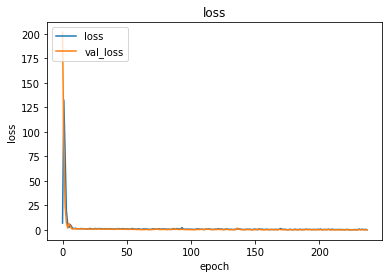

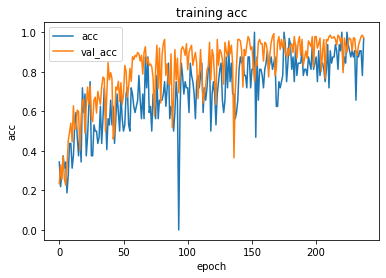

In [5]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('training acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

In [6]:
while True:
    ans = input('Do you want to save this model ? Yy/Nn')
    if ans == 'Y' or ans == 'y':
        model.save(MODEL_FILE)
        print('Model saved to ', MODEL_FILE)
        break
    elif ans == 'N' or ans == 'n':
        print('Exit without saving this model')
        break
    else:
        print('Cannot recognize input ', ans)

Do you want to save this model ? Yy/Nnn
Exit without saving this model
